In [1]:
import time
import glob, os, os.path
import h5py
import numpy as np

import matplotlib.pylab as plt

import os
os.environ['KERAS_BACKEND'] = 'theano'

%matplotlib inline
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import adam
from keras.models import Model

pathFiles = "/home/atilla/Documents/DeepLearning/Test/"
os.chdir(pathFiles)

Using Theano backend.


# Load Model and Weights. 


In [17]:
from keras.models import load_model
model = load_model('/home/atilla/Documents/DeepLearning/Test/model3.hdf5')
model.load_weights('/home/atilla/Documents/DeepLearning/Test/weights3_3.hdf5')
model.summary()

TypeError: load_model() got an unexpected keyword argument 'dim_ordering'

# Load data
In order to test the accuracy of the model


In [3]:
file_name = 'V2_'
detail = 'compact_rand_norm_cate'
files = [file for file in glob.glob("*.hdf5") if file_name+detail in file]
f = h5py.File(files[0])
dataset_x = f['data_x'][...]
dataset_y = f['data_y'][...]
print (dataset_x.shape, dataset_y.shape, len(dataset_x))

(625, 2, 30, 360) (625, 361) 625


In [4]:
# 2 Divide into train, test, validate

length = len(dataset_x)
length_train = int(round(0.8*length))
length_test = int(round(0.2*length))
#length_valid = int(round(0.2*length))
print(length_train, length_test)


500 125


In [5]:
np.random.seed(123) 
train_data_x = dataset_x[0:length_train]
train_data_y = dataset_y[0: length_train]
test_data_x = dataset_x[length_train: length_train+length_test+1]
test_data_y = dataset_y[length_train: length_train+length_test+1]

# Visualize input as arrows

(30, 360)


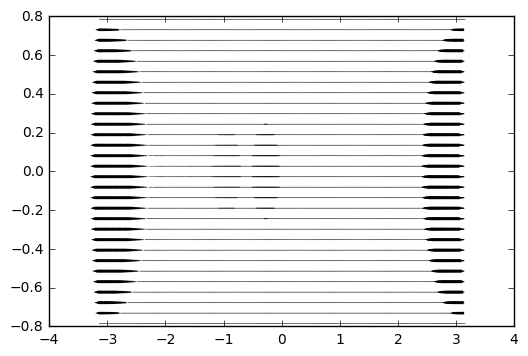

In [6]:
fov_x  = np.pi #half FOV along azimuth in radians
fov_y = np.pi/4 # half FOV along elevation in radians
res_x = 360 #amount of pixels along azimuth
res_y = 30 # amount of pixels along elevation

phis   = np.linspace(-fov_x, fov_x, res_x)
thetas = np.linspace(-fov_y, fov_y, res_y)

layout = np.array([[phi, theta] 
                   for theta in thetas
                   for phi in phis])
number = 40
ofx = train_data_x[number][0]
ofy = train_data_y[number][1]
plt.quiver(layout[:,0], layout[:,1], 
           ofx, ofy)
print(ofx.shape)


# Visualize input in colors

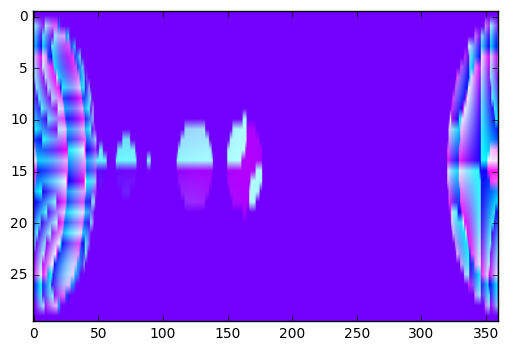

In [7]:
img_rgb =np.transpose(np.vstack([train_data_x[number],np.ones([1,train_data_x.shape[2], train_data_x.shape[3]])]),[1,2,0])
plt.imshow(img_rgb, aspect = 'auto')

In [15]:
score = model.evaluate(test_data_x, test_data_y, verbose=0)

ValueError: CorrMM images and kernel must have the same stack size

Apply node that caused the error: CorrMM{valid, (1, 1)}(IncSubtensor{InplaceSet;::, int64:int64:, int64:int64:, ::}.0, Subtensor{::, ::, ::int64, ::int64}.0)
Toposort index: 46
Inputs types: [TensorType(float32, 4D), TensorType(float32, 4D)]
Inputs shapes: [(32, 4, 32, 360), (16, 2, 3, 3)]
Inputs strides: [(184320, 46080, 1440, 4), (72, 36, -12, -4)]
Inputs values: ['not shown', 'not shown']
Outputs clients: [[Elemwise{Composite{(i0 * (Abs((i1 + i2)) + i1 + i2))}}[(0, 1)](TensorConstant{(1, 1, 1, 1) of 0.5}, CorrMM{valid, (1, 1)}.0, Reshape{4}.0)]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/usr/local/lib/python3.5/dist-packages/keras/utils/layer_utils.py", line 40, in layer_from_config
    custom_objects=custom_objects)
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 2582, in from_config
    process_layer(layer_data)
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 2577, in process_layer
    layer(input_tensors[0])
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 572, in __call__
    self.add_inbound_node(inbound_layers, node_indices, tensor_indices)
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 635, in add_inbound_node
    Node.create_node(self, inbound_layers, node_indices, tensor_indices)
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 166, in create_node
    output_tensors = to_list(outbound_layer.call(input_tensors[0], mask=input_masks[0]))
  File "/usr/local/lib/python3.5/dist-packages/keras/layers/convolutional.py", line 475, in call
    filter_shape=self.W_shape)
  File "/usr/local/lib/python3.5/dist-packages/keras/backend/theano_backend.py", line 1520, in conv2d
    filter_shape=filter_shape)

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [8]:
np.transpose(train_data_x, [1,2,3,0]).shape

(2, 30, 360, 500)


# Visualize output

In [14]:
y = model.predict((train_data_x))
#y1 = train_data_y[0:5] 
# t = np.linspace(0,361, 361, endpoint = True)
# plt.plot(t,y[4], t, y1[4]/100)
# plt.plot()

ValueError: CorrMM images and kernel must have the same stack size

Apply node that caused the error: CorrMM{valid, (1, 1)}(IncSubtensor{InplaceSet;::, int64:int64:, int64:int64:, ::}.0, Subtensor{::, ::, ::int64, ::int64}.0)
Toposort index: 39
Inputs types: [TensorType(float32, 4D), TensorType(float32, 4D)]
Inputs shapes: [(32, 4, 32, 360), (16, 2, 3, 3)]
Inputs strides: [(184320, 46080, 1440, 4), (72, 36, -12, -4)]
Inputs values: ['not shown', 'not shown']
Outputs clients: [[Elemwise{Composite{(i0 * (Abs((i1 + i2)) + i1 + i2))}}[(0, 1)](TensorConstant{(1, 1, 1, 1) of 0.5}, CorrMM{valid, (1, 1)}.0, Reshape{4}.0)]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/usr/local/lib/python3.5/dist-packages/keras/utils/layer_utils.py", line 40, in layer_from_config
    custom_objects=custom_objects)
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 2582, in from_config
    process_layer(layer_data)
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 2577, in process_layer
    layer(input_tensors[0])
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 572, in __call__
    self.add_inbound_node(inbound_layers, node_indices, tensor_indices)
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 635, in add_inbound_node
    Node.create_node(self, inbound_layers, node_indices, tensor_indices)
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 166, in create_node
    output_tensors = to_list(outbound_layer.call(input_tensors[0], mask=input_masks[0]))
  File "/usr/local/lib/python3.5/dist-packages/keras/layers/convolutional.py", line 475, in call
    filter_shape=self.W_shape)
  File "/usr/local/lib/python3.5/dist-packages/keras/backend/theano_backend.py", line 1520, in conv2d
    filter_shape=filter_shape)

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [ ]:
model.predict?